<a href="https://colab.research.google.com/github/JuniorHZ19/ML/blob/main/convolucionmejroar2.4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@markdown # *0) ** Instalando libreria(OBLIGATORIO)

!pip install torch torchvision torchaudio

In [2]:
#@markdown # *1) ** Descargando DataSet  de perros y gatos(OBLIGATORIO)
import zipfile

nombre_zip="data_set_dogcat.zip"

directorio_destino="/content/"

!gdown --id 19u9sy2053Ds739lyYSJut6S_k54trLnd -O {nombre_zip}

with zipfile.ZipFile(nombre_zip, 'r') as zip_ref:
    zip_ref.extractall(directorio_destino)



/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=19u9sy2053Ds739lyYSJut6S_k54trLnd
To: /content/data_set_dogcat.zip
100% 826M/826M [00:15<00:00, 53.8MB/s]


In [62]:
#@markdown # *0.5) **Arreglo dataset poner secucias archvios y eliminar no imagnees
import os

# Ruta de tu directorio
directorio = "/content/PetImages/Dog"

# Extensiones permitidas
extensiones_permitidas = {".jpg", ".jpeg", ".png"}

# Recorre el directorio
for root, dirs, files in os.walk(directorio):
    for file in files:
        # Obtiene la extensión del archivo
        _, extension = os.path.splitext(file)

        # Verifica si la extensión no está en la lista de extensiones permitidas y elimina el archivo
        if extension.lower() not in extensiones_permitidas:
            archivo_a_eliminar = os.path.join(root, file)
            os.remove(archivo_a_eliminar)
            print(f"Se eliminó: {archivo_a_eliminar}")

#Cambiar nombre de cada archivo de la carpeta secuecnialmente


lista_archivo = os.listdir(directorio)
subfijo="perro"
# Iterar sobre los archivos y cambiarles el nombre
for i, archivo in enumerate(lista_archivo, start=1):
    # Construir el nuevo nombre del archivo
    nuevo_nombre = f"{subfijo}{i}{os.path.splitext(archivo)[1]}"

    # Ruta completa del archivo antiguo y nuevo
    ruta_antigua = os.path.join(directorio, archivo)
    ruta_nueva = os.path.join(directorio, nuevo_nombre)

    # Cambiar el nombre del archivo
    os.rename(ruta_antigua, ruta_nueva)

    print(f"Se cambió el nombre de {ruta_antigua} a {ruta_nueva}")

Se truncaron las últimas líneas 5000 del resultado de transmisión.
Se cambió el nombre de /content/PetImages/Dog/perro5565.jpg a /content/PetImages/Dog/perro7501.jpg
Se cambió el nombre de /content/PetImages/Dog/perro179.jpg a /content/PetImages/Dog/perro7502.jpg
Se cambió el nombre de /content/PetImages/Dog/perro912.jpg a /content/PetImages/Dog/perro7503.jpg
Se cambió el nombre de /content/PetImages/Dog/perro9405.jpg a /content/PetImages/Dog/perro7504.jpg
Se cambió el nombre de /content/PetImages/Dog/perro527.jpg a /content/PetImages/Dog/perro7505.jpg
Se cambió el nombre de /content/PetImages/Dog/perro7867.jpg a /content/PetImages/Dog/perro7506.jpg
Se cambió el nombre de /content/PetImages/Dog/perro8590.jpg a /content/PetImages/Dog/perro7507.jpg
Se cambió el nombre de /content/PetImages/Dog/perro12157.jpg a /content/PetImages/Dog/perro7508.jpg
Se cambió el nombre de /content/PetImages/Dog/perro9952.jpg a /content/PetImages/Dog/perro7509.jpg
Se cambió el nombre de /content/PetImages/Do

In [69]:
#@markdown # *1) ** Creacion de el csv de los path y clases(OBLIGATORIO)
import os
import cv2
import pandas as pd

def validarLecturaImg(directorio,lista):
 for ruta in(gato_lista):
   imagen=cv2.imread(directorio+ruta)
   if  imagen is None:
    os.remove(directorio_gato+ruta)
    print(f"No se pudo leer y se elimino archivo:{directorio_gato+ruta}")
   else:
    print("si existe")


def crear_paths_csv(directorio_base,clases_lista,clases,nombre_archivo):

   columnas=["path","etiqueta"]
   datos_csv=[]

   for dir_base,dir,clase in  zip(directorio_base,clases_lista,clases):

    for path  in (dir):

     datos_csv.append([dir_base+path ,clase])


   df_lista=pd.DataFrame(datos_csv,columns=columnas)
   df_lista.to_csv(nombre_archivo,index=False)
   print("Csv Creado")

directorio_gato="/content/PetImages/Cat/"
directorio_perro="/content/PetImages/Dog/"

gato_lista=os.listdir(directorio_gato)
perro_lista=os.listdir(directorio_perro)

validarLecturaImg(directorio_gato,gato_lista)
validarLecturaImg(directorio_perro,perro_lista)


crear_paths_csv([directorio_gato,directorio_perro],[gato_lista,perro_lista],[0,1],"Data_set_paths.csv")






Csv Creado


In [50]:
#@markdown # *2) ** Creacion de clase DATASET(OBLIGATORIO)
import torch
from torch.utils.data import Dataset,DataLoader
import pandas as pd

import sklearn
import cv2
from PIL import Image


class MiDataSet(Dataset):

  def __init__(self,csv_file, transform=None):


     self.data=pd.read_csv(csv_file)

     self.x=self.data["path"]
     self.y=self.data["etiqueta"]

     self.transform=transform

     self.samples=self.data["path"].shape[0]


  def __getitem__(self,id):

    rut_imagen=self.x[id]
    imagen=cv2.imread(rut_imagen)
    etiqueta=self.y[id]

    if imagen is None:
     print(f"No se pudo cargar la imagen en {rut_imagen}")


    imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)


    if self.transform:
      imagen_rgb = self.transform(imagen_rgb)

    return imagen_rgb,etiqueta


  def __len__(self):
   return self.samples





In [48]:

#@markdown # *3) ** Separacion dos archivos difentes para entrenamietno y prueba(OBLIGATORIO)

from sklearn.model_selection import train_test_split

misdatos=pd.read_csv("/content/Data_set_paths.csv")
# Separo mis datos en entrenamiento y test
datos_entrenamiento, datos_evaluacion = train_test_split(misdatos, test_size=0.3, random_state=42)


# Guardar los dos conjuntos en archivos CSV separados
datos_entrenamiento.to_csv("/content/datos_entrenamiento.csv", index=False)
datos_evaluacion.to_csv("/content/datos_evaluacion.csv", index=False)




/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


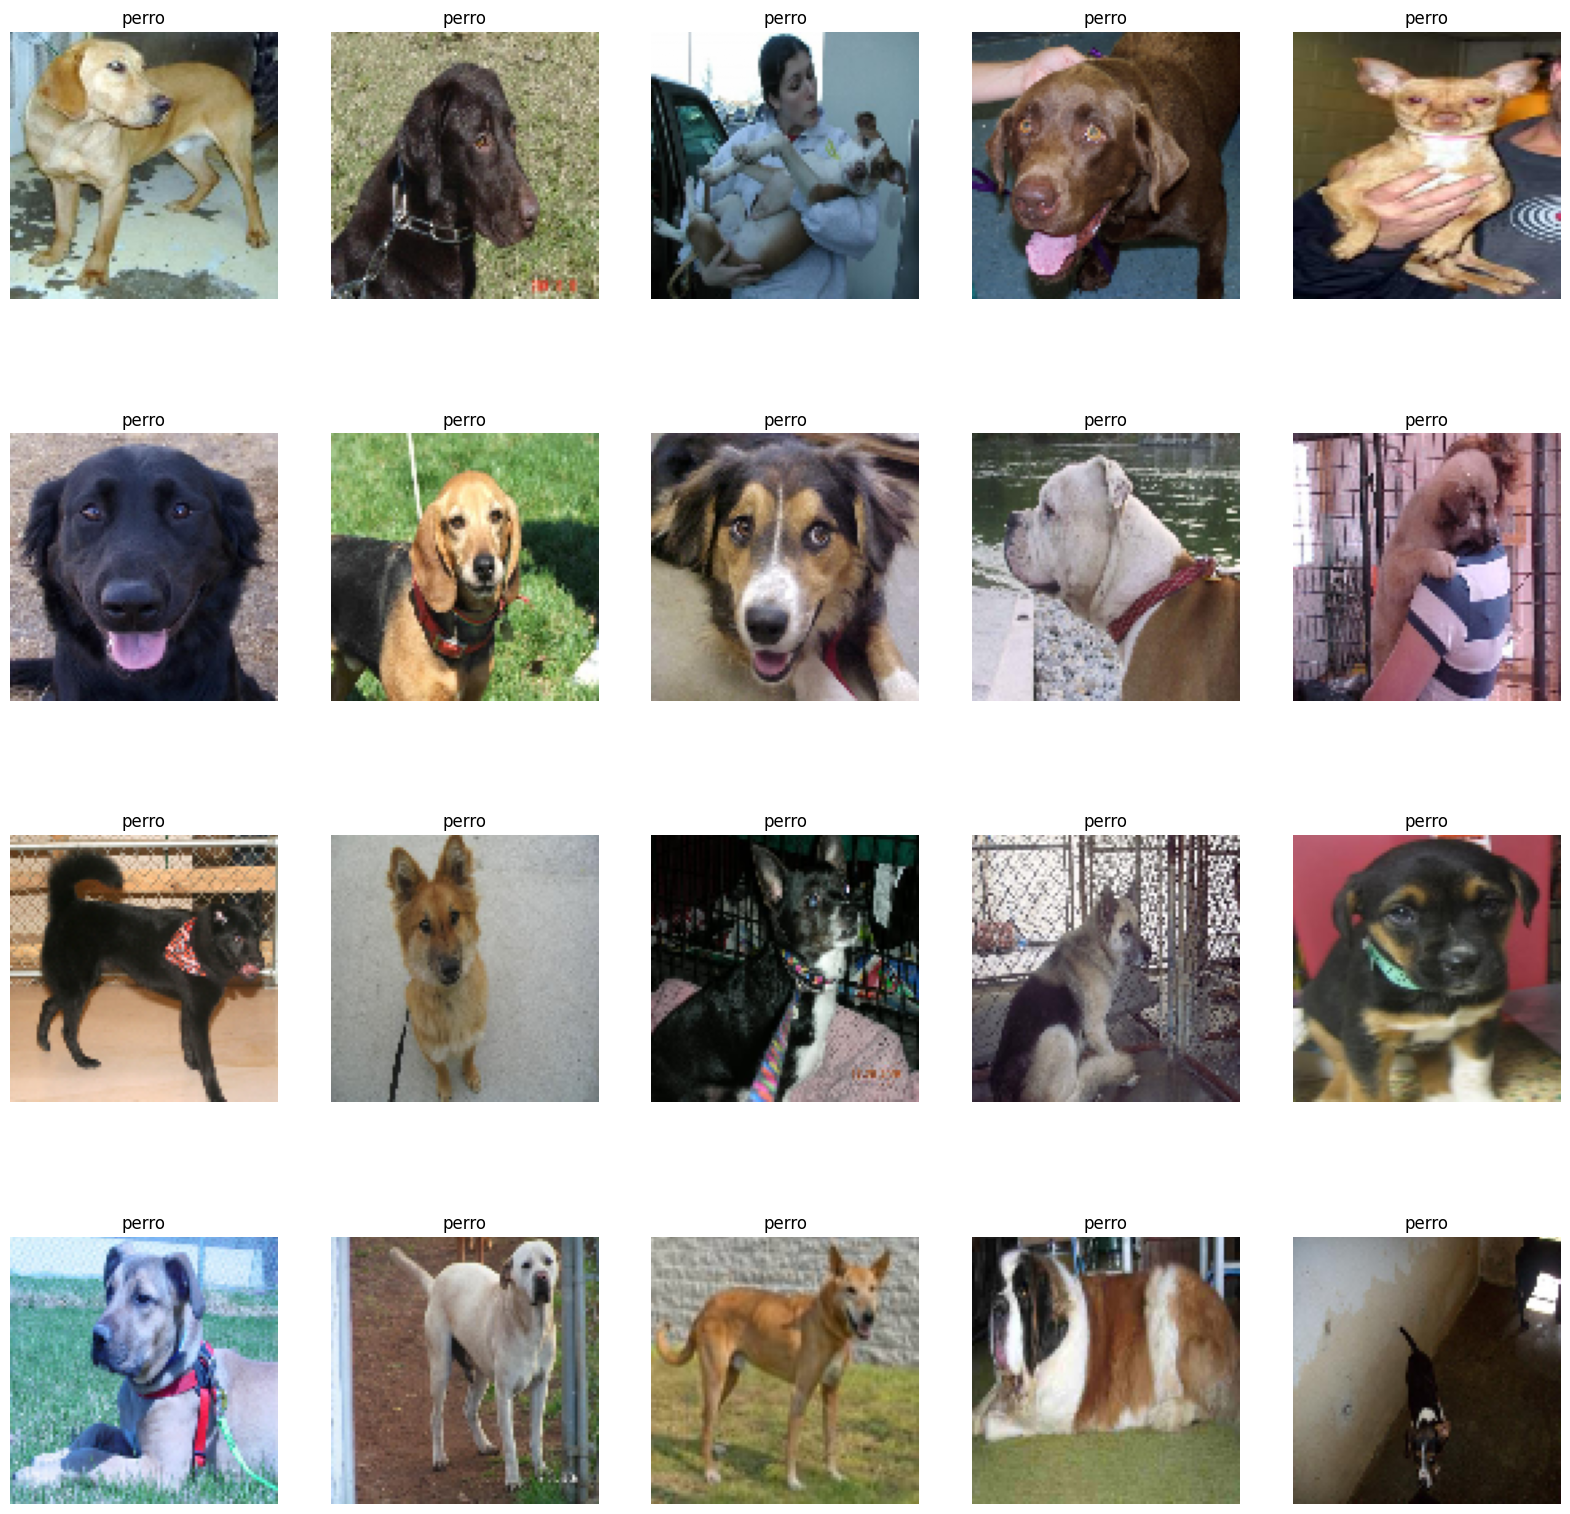

In [51]:
#@markdown # *2) ** Mostrar 20 muestras(Opcional)
import matplotlib.pyplot as plt
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
import pandas as pd
from PIL import Image


# Definir transformaciones
transformaciones = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((100, 100))
])

# Crear dataset y DataLoader
muestra = MiDataSet("/content/datos_entrenamiento.csv", transformaciones)
data_muestra = DataLoader(muestra, batch_size=20, shuffle=True)

# Obtener el primer lote
primer_lote = next(iter(data_muestra))
tensor_imagenes, tensor_etiquetas = primer_lote

# Mapeo de etiquetas numéricas a etiquetas de texto
mapeo_etiquetas = {0: 'gato', 1: 'perro'}
etiquetas_texto = [mapeo_etiquetas[item.item()] for item in tensor_etiquetas]

# Crear una figura y subgráficos
fig, axs = plt.subplots(4, 5, figsize=(20, 20))

# Iterar sobre las imágenes del lote
for i in range(4):
    for j in range(5):
        idx = i * 5 + j
        imagen = tensor_imagenes[idx].permute(1, 2, 0)
        etiqueta_texto = etiquetas_texto[idx]

        # Mostrar la imagen en el subgráfico correspondiente
        axs[i, j].imshow(imagen)
        axs[i, j].set_title(etiqueta_texto)
        axs[i, j].axis('off')

plt.show()


In [52]:
import sklearn
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset

transformaciones = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((100, 100))
])

mis_datos_entrenamiento=MiDataSet("/content/datos_entrenamiento.csv",transform=transformaciones)

mis_datos_test=MiDataSet("/content/datos_evaluacion.csv",transform=transformaciones)


data_por_lote_entrenamiento=DataLoader(mis_datos_entrenamiento,batch_size=5,shuffle=True)

data_por_por_lote_test=DataLoader(mis_datos_test,batch_size=5,shuffle=True)







In [53]:
import torch.nn as nn
import torch.nn.functional as F



class RedConvolucional(nn.Module):

   def __init__(self):
    super(RedConvolucional,self).__init__()

#Red convolulcional

    self.conv1=nn.Conv2d(in_channels=3,out_channels=6,kernel_size=3, stride=1, padding=1)
    self.conv2=nn.Conv2d(in_channels=6,out_channels=12,kernel_size=3, stride=1, padding=1)
    self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)

    self.conv3=nn.Conv2d(in_channels=12,out_channels=24,kernel_size=3, stride=1, padding=1)
    self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)

    self.conv4=nn.Conv2d(in_channels=24,out_channels=48,kernel_size=3, stride=2, padding=1)
    self.maxpool3 = nn.MaxPool2d(kernel_size=2, stride=2)

    self.flatten=nn.Flatten()

#Red fully conected o multicapa convecional

    self.capa_oculta=nn.Linear(1728,100)

    self.capa_salida=nn.Linear(100,2)


   def forward(self,x):
    #Capa convolucionales
     x=self.conv1(x)
     x=F.relu(x)

     x=self.conv2(x)
     x=F.relu(x)
     x=self.maxpool1(x)

     x=self.conv3(x)
     x=F.relu(x)
     x=self.maxpool2(x)

     x=self.conv4(x)
     x=F.relu(x)
     x=self.maxpool3(x)
     x=self.flatten(x)

#Capa fully conected
     x=self.capa_oculta(x)
     x=F.relu(x)

     x=self.capa_salida(x)
     output=F.softmax(x, dim=-1)




     return output


In [56]:


if torch.cuda.is_available():
    # Configurar el dispositivo por defecto
    torch.cuda.set_device(0)

#funcion clasificador:
def clasificador(y_pred_test):
 max_values_tensor=torch.empty((0,),dtype=torch.float32)

 for tensor in y_pred_test:
   max_values,max_indices=torch.max(tensor,dim=0)

   max_values_tensor=torch.cat((max_values_tensor,max_indices.unsqueeze(0)))

 return max_values_tensor

#funcion acutity:
def accurity(y_test,y_real):
   correctos=0
   for predicho, real in zip(y_test, y_real):
    if predicho==real:
     correctos+=1
   return correctos/len(y_test)


import torch.optim as optim


ModeloRC=RedConvolucional()

ModeloRC=ModeloRC
criterio=nn.BCEWithLogitsLoss()

optimizer=optim.SGD(ModeloRC.parameters(),lr=0.1)

epochs=6
ModeloRC.train()
for epoch in range(epochs):

 for i,(xi,yi) in enumerate(data_por_lote_entrenamiento):

    y_predict=ModeloRC(xi)
    y_predic_train_clasificado=clasificador(y_predict)

    loss=criterio(y_predic_train_clasificado,yi.float())
    print(f'Epoca[{epoch+1}],Perdida: {loss.item():.4f} ')


 loss.backward()
 optimizer.step()
 optimizer.zero_grad()

 with torch.no_grad():
   for i,(xi,yi) in enumerate(data_por_por_lote_test):
    y_predict_test=ModeloRC(xi)
    y_predic_test_clasificado=clasificador(yi)

   Precision=accurity(y_predict_test,y_predic_test_clasificado)




Epoca[1],Perdida: 0.6931 
Epoca[1],Perdida: 0.6931 
Epoca[1],Perdida: 0.6931 
Epoca[1],Perdida: 0.6931 
Epoca[1],Perdida: 0.6931 
Epoca[1],Perdida: 0.6931 
Epoca[1],Perdida: 0.6931 
Epoca[1],Perdida: 0.6931 
Epoca[1],Perdida: 0.6931 
Epoca[1],Perdida: 0.6931 
Epoca[1],Perdida: 0.6931 
Epoca[1],Perdida: 0.6931 
Epoca[1],Perdida: 0.6931 
Epoca[1],Perdida: 0.6931 
Epoca[1],Perdida: 0.6931 
Epoca[1],Perdida: 0.6931 
Epoca[1],Perdida: 0.6931 
Epoca[1],Perdida: 0.6931 
Epoca[1],Perdida: 0.6931 
Epoca[1],Perdida: 0.6931 
Epoca[1],Perdida: 0.6931 
Epoca[1],Perdida: 0.6931 
Epoca[1],Perdida: 0.6931 
Epoca[1],Perdida: 0.6931 
Epoca[1],Perdida: 0.6931 
Epoca[1],Perdida: 0.6931 
Epoca[1],Perdida: 0.6931 
Epoca[1],Perdida: 0.6931 
Epoca[1],Perdida: 0.6931 
Epoca[1],Perdida: 0.6931 
Epoca[1],Perdida: 0.6931 
Epoca[1],Perdida: 0.6931 
Epoca[1],Perdida: 0.6931 
Epoca[1],Perdida: 0.6931 
Epoca[1],Perdida: 0.6931 
Epoca[1],Perdida: 0.6931 
Epoca[1],Perdida: 0.6931 
Epoca[1],Perdida: 0.6931 
Epoca[1],Per

error: ignored

In [ ]:


y_pred_multiclases = torch.tensor([[0.1, 1.8, 0.8, 0.4, 2],
                                   [0.5, 2, 3.5, 5, 2.1]])

def clasificador(y_pred_test):

   max_values_tensor = torch.empty((0,), dtype=torch.float32)

   for tensor in y_pred_test:

     max_values, max_indices  = torch.max(tensor, dim=0)

     max_values_tensor = torch.cat((max_values_tensor, max_indices.unsqueeze(0)))

   return max_values_tensor

print(clasificador(y_pred_multiclases))


tensor([4., 3.])
